/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_15335/1480040078.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


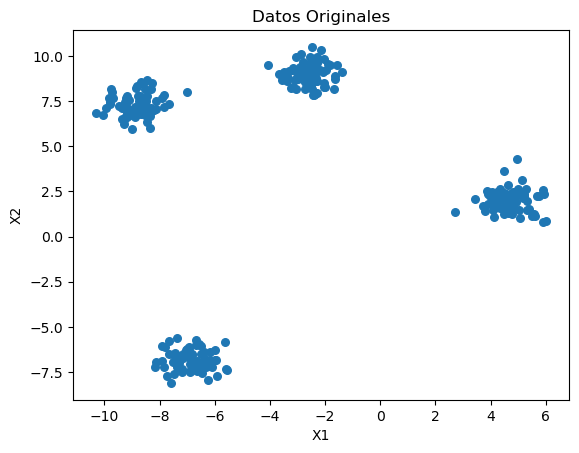

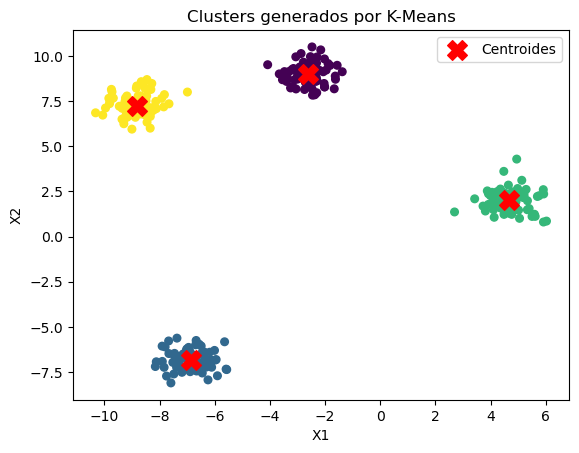

Silhouette Score: 0.88


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar datos de ejemplo
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualizar los datos originales
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Datos Originales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Predecir etiquetas
y_kmeans = kmeans.predict(X)

# Visualizar los clusters generados por K-Means
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clusters generados por K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Calcular métrica de Silhouette
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")


### Mecanismos de optimización para escoger el K

#### Conceptos

**1. ¿Qué mide la Inertia en K-Means?**

La **Inertia** es una medida interna de K-Means que cuantifica cómo de compactos están los clusters. Se define como la suma de las distancias cuadradas de cada punto a su centroide más cercano:

$$
\text{Inertia} = \sum_{i=1}^{N} \| x_i - c_{j} \|^2
$$

Donde:
- $N$ es el número total de puntos.
- $x_i$ es un punto de datos.
- $c_j$ es el centroide del cluster más cercano.

**Interpretación:**
- **Baja Inertia**: Los puntos están más cerca de sus centroides (clusters compactos).
- **Alta Inertia**: Los puntos están más dispersos respecto a sus centroides.

**Método del Codo:**
- La inertia disminuye a medida que aumenta el número de clusters ($K$).
- El punto donde la disminución de la inertia empieza a estabilizarse se conoce como el "codo" y se interpreta como el $K$ óptimo.

**Limitación:**
- La inertia siempre disminuye al aumentar $K$, por lo que no garantiza la calidad del clustering, solo mide compactación.

---

**2. ¿Qué mide el Silhouette Score?**

El **Silhouette Score** evalúa la calidad del clustering midiendo qué tan bien separados y compactos están los clusters. Su fórmula es:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Donde:
- $a(i)$: Distancia promedio entre un punto $i$ y los otros puntos del mismo cluster.
- $b(i)$: Distancia promedio entre un punto $i$ y los puntos del cluster más cercano al que no pertenece.

**Interpretación del Score:**
- **Silhouette Score** está en el rango $[-1, 1]$:
  - $s(i) \approx 1$: Puntos bien asignados a su cluster.
  - $s(i) \approx 0$: Puntos en el límite entre clusters.
  - $s(i) \approx -1$: Puntos asignados al cluster equivocado.

**Usos:**
- Se utiliza para evaluar qué tan bien definidos están los clusters.
- Se considera el mejor $K$ aquel que maximiza el **Silhouette Score**.

---

**Diferencias Clave:**

| **Métrica**        | **Qué mide**                                              | **Uso principal**                        |
|--------------------|----------------------------------------------------------|------------------------------------------|
| **Inertia**        | Compactación dentro de los clusters                      | Identificar $K$ con el "Método del Codo". |
| **Silhouette Score** | Separación entre clusters y cohesión interna            | Medir la calidad general del clustering. |

Ambas métricas son complementarias: 
- **Inertia** es útil para compactación, pero no garantiza buena separación.
- **Silhouette Score** evalúa tanto la compactación como la separación entre clusters.

#### Código

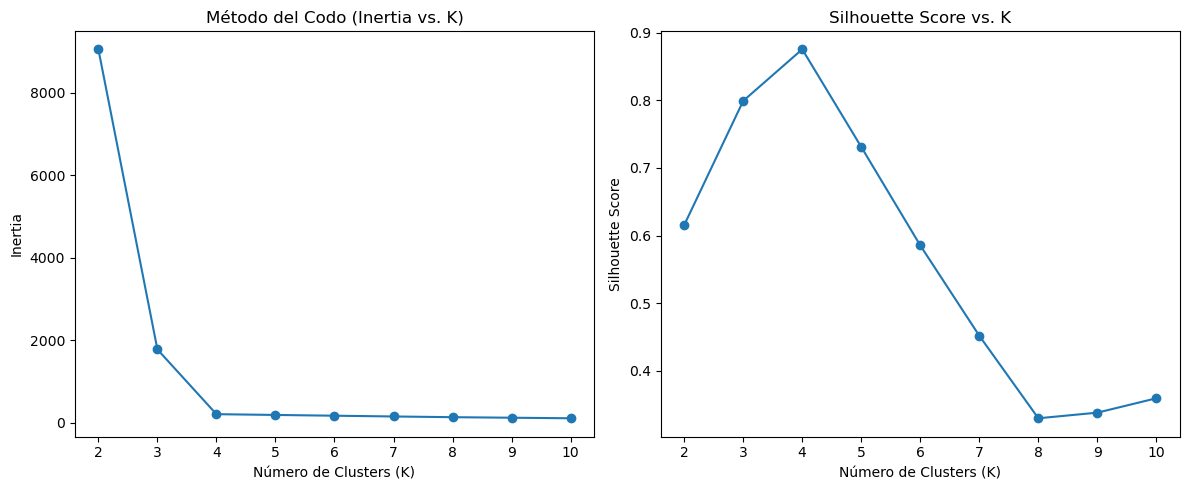

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar datos de ejemplo
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Calcular Inertia y Silhouette Score para diferentes valores de K
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_15335/1306815931.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


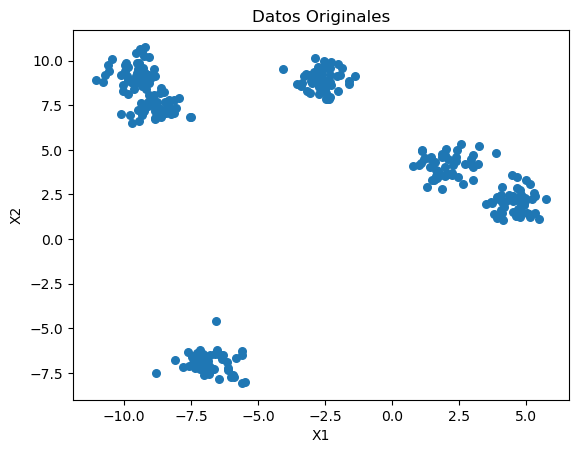

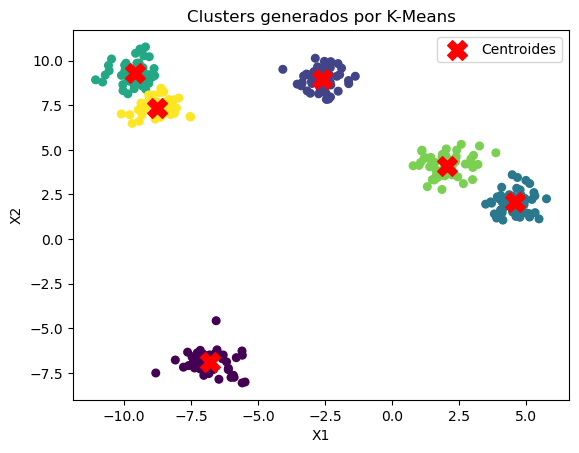

Silhouette Score: 0.71


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar datos de ejemplo
X, y_true = make_blobs(n_samples=300, centers=6, cluster_std=0.60, random_state=42)

# Visualizar los datos originales
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Datos Originales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

# Predecir etiquetas
y_kmeans = kmeans.predict(X)

# Visualizar los clusters generados por K-Means
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clusters generados por K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Calcular métrica de Silhouette
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")